In [51]:
library(dplyr)
library(ggplot2)
library(qvalue)

In [31]:
coloc_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/coloc_neuroseq_25_traits.tsv"
df = read.csv(coloc_file, sep="\t")
head(df,2)

GWAS,GWAS_locus_ID,Cell_type,EnsembleID_GRCh38_v90,N_variants_overlapping_btw_GWAS_eQTL,PP0,PP1,PP2,PP3,PP4,Chromosome_GRCh38,GWAS_index_position_GRCh38,eQTL_lead_position_GRCh38
GCST002245,1,FPP_D11,ENSG00000196352,1401,9.013658e-10,0.6315856,4.294654e-10,0.30085818,0.06755621,1,207747296,207299599
GCST002245,1,FPP_D11,ENSG00000117335,1705,1.350689e-09,0.9464255,5.305940e-11,0.03716222,0.01641229,1,207747296,208176628


In [32]:
nrow(df)

[1] 162313

In [33]:
da_df = df[grep("DA",df$Cell_type),]
nrow(da_df)
head(da_df,2)

[1] 31774

,GWAS,GWAS_locus_ID,Cell_type,EnsembleID_GRCh38_v90,N_variants_overlapping_btw_GWAS_eQTL,PP0,PP1,PP2,PP3,PP4,Chromosome_GRCh38,GWAS_index_position_GRCh38,eQTL_lead_position_GRCh38
483,GCST002245,1,DA_D30,ENSG00000196352,1191,1.230127e-09,0.86194825,1.578736e-10,0.1105944,0.027457396,1,207747296,207496129
484,GCST002245,1,DA_D30,ENSG00000076356,768,1.601556e-10,0.09821254,1.466396e-09,0.8992388,0.002548686,1,207747296,207829220


In [34]:
da_sign_df = da_df[da_df$PP4>0.5,]
nrow(da_sign_df)
head(da_sign_df,2)

[1] 459

,GWAS,GWAS_locus_ID,Cell_type,EnsembleID_GRCh38_v90,N_variants_overlapping_btw_GWAS_eQTL,PP0,PP1,PP2,PP3,PP4,Chromosome_GRCh38,GWAS_index_position_GRCh38,eQTL_lead_position_GRCh38
3263,GCST003496,17,DA_D30,ENSG00000051825,535,1.743264e-14,6.906471e-12,0.0003775438,0.1487246,0.8508979,12,123688849,123615098
3264,GCST003496,17,DA_D30,ENSG00000182196,518,3.131037e-04,1.240456e-01,0.0004172993,0.1646152,0.7106088,12,123688849,123660721


In [35]:
length(unique(da_sign_df$EnsembleID_GRCh38_v90))

[1] 232

In [36]:
# this file contains estimated genetic effects due to GxC for 8,352 pseudo-cells, 213 significant sp-eQTL
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt"
df0 = read.csv(filename, sep = "\t")
ncol(df0)
head(df0,2)

[1] 213

,ABHD10_.3_111697439_T_G,ABHD12B_.14_51328222_C_T,ACKR2_.3_42817129_C_T,ADD2_.2_70894426_A_T,ADSL_.22_40757228_A_C,AIM1L_.1_26673825_C_T,AKAP7_.6_131691964_C_A,ALDH7A1_.5_126011412_G_A,ANKRD18B_.9_33524775_C_A,APIP_.11_34905987_T_C,...,YWHAE_.17_1246420_G_A,ZBBX_.3_167080934_T_G,ZC3HAV1_.7_138730361_T_C,ZFR2_.19_3840157_C_T,ZG16B_.16_2871121_T_C,ZNF423_.16_49599995_C_G,ZNF552_.19_58315273_G_A,ZNF738_.19_21474173_G_A,ZNF77_.19_2936535_G_A,ZP3_.7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.2235163,-0.03575032,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.1120253,-0.04172133,0.01126897,0.1057579,-0.03101814,0.0909417,0.3020245,-0.1583842,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.1921801,-0.01471768,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.3759854,0.08774666,0.02505916,-0.1950055,-0.22780547,0.0775938,0.3452492,-0.3472152,-0.15259400


In [37]:
genes_GxC = gsub("_.*","",colnames(df0))
genes_GxC = gsub("\\.","-",genes_GxC)
head(genes_GxC)

[1] "ABHD10"  "ABHD12B" "ACKR2"   "ADD2"    "ADSL"    "AIM1L"

In [38]:
#load map HGNC to ensembl
mapping_df = read.csv('/nfs/leia/research/stegle/dseaton/genomes/hg19/annotation/geneid_mappings/hgnc_symbol2ensembl_gene_id.txt', sep='\t')
head(mapping_df,2)

hgnc_symbol,ensembl_gene_id
SLC25A26,ENSG00000261657
,ENSG00000223116


In [39]:
da_sign_df$ensembl_gene_id = da_sign_df$EnsembleID_GRCh38_v90
df1 = left_join(da_sign_df, mapping_df)
nrow(df1)
head(df1,2)

Joining, by = "ensembl_gene_id"


[1] 459

GWAS,GWAS_locus_ID,Cell_type,EnsembleID_GRCh38_v90,N_variants_overlapping_btw_GWAS_eQTL,PP0,PP1,PP2,PP3,PP4,Chromosome_GRCh38,GWAS_index_position_GRCh38,eQTL_lead_position_GRCh38,ensembl_gene_id,hgnc_symbol
GCST003496,17,DA_D30,ENSG00000051825,535,1.743264e-14,6.906471e-12,0.0003775438,0.1487246,0.8508979,12,123688849,123615098,ENSG00000051825,MPHOSPH9
GCST003496,17,DA_D30,ENSG00000182196,518,3.131037e-04,1.240456e-01,0.0004172993,0.1646152,0.7106088,12,123688849,123660721,ENSG00000182196,ARL6IP4


In [40]:
genes_coloc = unique(df1$hgnc_symbol)
length(genes_GxC)
length(genes_coloc)
length(genes_GxC[genes_GxC %in% genes_coloc])

[1] 213

[1] 232

[1] 14

In [41]:
genes_GxC[genes_GxC %in% genes_coloc]

[1] "ATG10"    "CHRNA3"   "EIF5A"    "GALNT10"  "KANSL1"   "MAPT-AS1"
 [7] "MAST3"    "MPHOSPH9" "PRR7-AS1" "PRSS36"   "RHEBL1"   "SLC35E2" 
[13] "STAT6"    "TUBGCP4"

In [42]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/"
file = paste0(mydir,"MOFA/MOFA10/summary.csv")
df2 = read.csv(file, row.names=1)
head(df2,2)

,gene,n_snps,chrom,pv_raw,snpID,pv,gene_old
0,LINC00662,1,19,0.05827479,19_28250771_G_A,0.05827479,LINC00662
1,ATRAID,2,2,0.66353704,2_27389195_A_G,1.00000000,ATRAID


In [43]:
df2 = df2[order(df2$pv, df2$pv_raw),]
df2 = df2[-which(duplicated(df2$gene)),]
df2$qv = qvalue(df2$pv, pi0 = 1)$qvalue
##
c(nrow(df2), nrow(df2[df2$qv<0.05,]))

[1] 1374  213

In [46]:
genes_all = unique(df2$gene)
genes_all = gsub("\\.","-",genes_all)
length(genes_all[genes_all %in% genes_coloc])

[1] 94

In [48]:
length(genes_all)

[1] 1374

In [63]:
df_to_plot1 = data.frame(value = c(1374-213, 213), group=c("no GxC","GxC"))

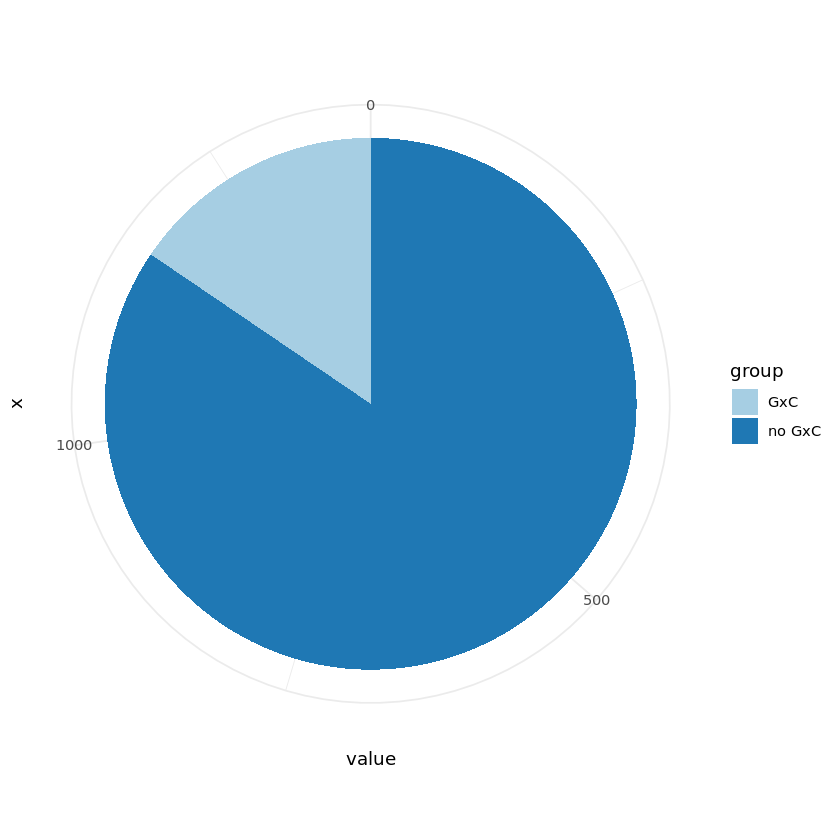

In [67]:
bp<- ggplot(df_to_plot1, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start=0) + theme_minimal() + scale_fill_brewer(palette="Paired")
pie

In [68]:
df_to_plot1 = data.frame(value = c(94-14, 14), group=c("no GxC","GxC"))

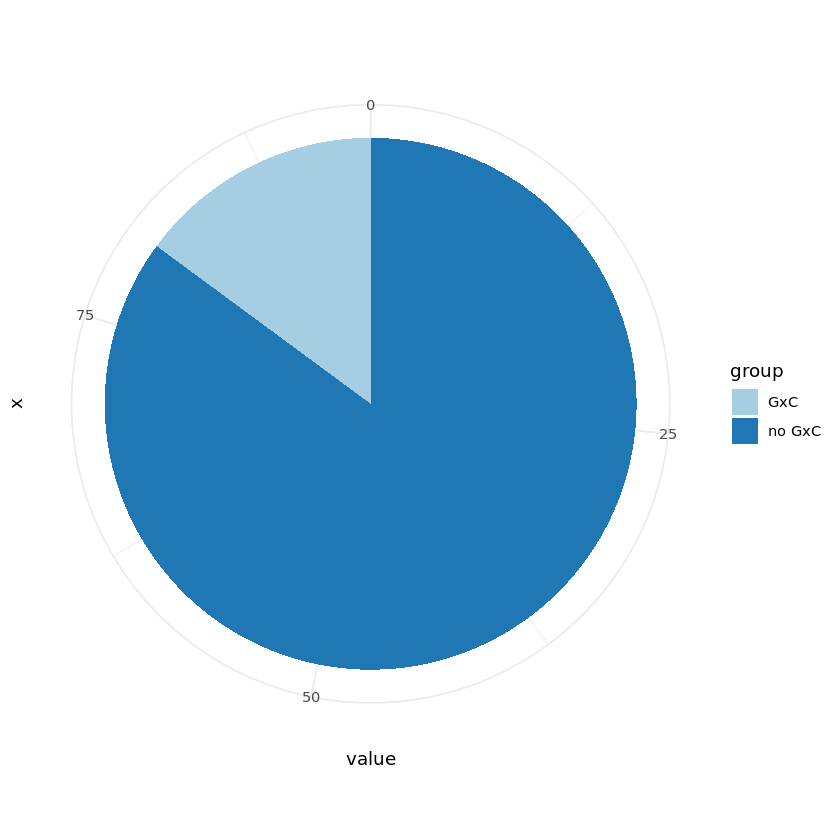

In [69]:
bp<- ggplot(df_to_plot1, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start=0) + theme_minimal()+ scale_fill_brewer(palette="Paired")
pie